In [1]:
import librosa
import librosa.display as ld
import numpy as np
import matplotlib.pyplot as plt
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

<h1>Uploading from local file</h1>


In [3]:
from google.colab import drive
drive.mount('/content/drive')


import os

os.chdir("/content/drive/MyDrive/Ravdess")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls

Actor_01/  Actor_05/  Actor_09/  Actor_13/  Actor_17/  Actor_21/  audio_speech_actors_01-24/
Actor_02/  Actor_06/  Actor_10/  Actor_14/  Actor_18/  Actor_22/
Actor_03/  Actor_07/  Actor_11/  Actor_15/  Actor_19/  Actor_23/
Actor_04/  Actor_08/  Actor_12/  Actor_16/  Actor_20/  Actor_24/


In [5]:
data, sampling_rate = librosa.load('Actor_01/03-01-01-01-01-02-01.wav')

In [6]:
mylist= os.listdir()

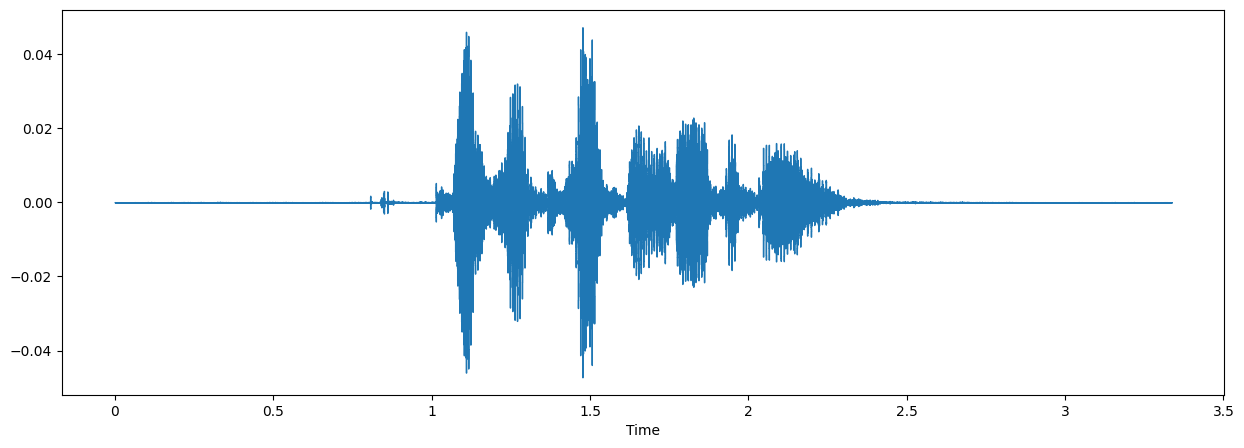

In [7]:
plt.figure(figsize=(15, 5))
ld.waveshow(data,sr=sampling_rate)

In [8]:
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name)
    if chroma:
        stft = np.abs(librosa.stft(X))
        result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel))
    return result


In [9]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}


observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [11]:
from pathlib import Path
x,y=[],[]
folder_path = ''
count=0
for folder in mylist:
    folder_path=Path(folder)
    for filename in folder_path.iterdir():
        if os.path.isfile(filename):
          file_name=os.path.basename(filename)
          emotion=emotions[file_name.split("-")[2]]
          if emotion not in observed_emotions:
              continue
          feature=extract_feature(filename, mfcc=True, chroma=True, mel=True)
          x.append(feature)
          y.append(emotion)

In [12]:
print(len(x[1]))
x=np.array(x)

180


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
print((x_train.shape[0], x_test.shape[0]))

(512, 128)


In [20]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=800)

In [21]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=800)

In [22]:
y_pred=model.predict(x_test)

['calm' 'happy' 'calm' 'calm' 'fearful' 'fearful' 'disgust' 'calm'
 'disgust' 'fearful' 'calm' 'happy' 'happy' 'disgust' 'fearful' 'fearful'
 'calm' 'calm' 'happy' 'fearful' 'calm' 'disgust' 'disgust' 'disgust'
 'calm' 'disgust' 'fearful' 'calm' 'happy' 'calm' 'calm' 'disgust'
 'disgust' 'happy' 'fearful' 'happy' 'calm' 'fearful' 'disgust' 'disgust'
 'happy' 'disgust' 'calm' 'disgust' 'happy' 'disgust' 'happy' 'disgust'
 'disgust' 'happy' 'happy' 'fearful' 'disgust' 'calm' 'happy' 'happy'
 'disgust' 'happy' 'disgust' 'disgust' 'happy' 'calm' 'calm' 'happy'
 'disgust' 'calm' 'happy' 'calm' 'happy' 'disgust' 'disgust' 'fearful'
 'disgust' 'calm' 'disgust' 'disgust' 'fearful' 'disgust' 'calm' 'disgust'
 'fearful' 'disgust' 'disgust' 'fearful' 'calm' 'calm' 'fearful' 'happy'
 'calm' 'happy' 'fearful' 'calm' 'happy' 'calm' 'disgust' 'disgust'
 'disgust' 'disgust' 'disgust' 'disgust' 'calm' 'happy' 'happy' 'happy'
 'happy' 'happy' 'fearful' 'disgust' 'calm' 'disgust' 'fearful' 'fearful'
 'fe

In [23]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)


print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.22%
